# CS3PP19 - Programming in Python for Data Science - Practical 2

## Pandas & NumPy

Follow the instructions to complete each of these tasks. This set of exercises focuses on working with Python's Pandas library.

**Questions marked with a * are extra challenging**

The relevant materials for these exercises are lectures Lectures 4, 5 and 6 (NumPy and Pandas).

This is not assessed but will help you gain practical experience for the exam and coursework.

You will need to download some of the csv data set files from the module Blackboard page and place them in the same folder as this notebook. Run the cell below to load all of the necessary Python modules.

### PANDAS

In [1]:
import pandas as pd
import requests
import numpy as np
from pandas.io.json import json_normalize

x = pd.DataFrame()

## 1. Diamonds example data

1.1. Read in the diamonds csv file to a pandas data frame. Use pandas to find how many diamonds have carat greater than 3.5.

In [2]:
diamonds = pd.read_csv("diamonds.csv")
diamonds[diamonds.carat > 3.5]

,carat,cut,color,clarity,depth,table,price,x,y,z
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


In [4]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.loc[diamonds['carat']> 3.5]

,carat,cut,color,clarity,depth,table,price,x,y,z
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


<hr style="border:2px solid black"> </hr>

1.2. Create a series of the price of all of the diamonds that have carat greater than 3.5.

In [5]:
diamonds.loc[diamonds['carat']> 3.5, 'price']

23644    11668
25998    15223
25999    15223
26444    15984
26534    16193
27130    17329
27415    18018
27630    18531
27679    18701
Name: price, dtype: int64

<hr style="border:2px solid black"> </hr>

1.3. For ideal cut diamonds whose price is greater than 10000, find the number of diamonds having each clarity.

In [6]:
diamonds.loc[diamonds['price']> 10000].groupby(diamonds['clarity'])['carat'].count()
diamonds.loc[(diamonds['price']> 10000)&(diamonds['cut'] == 'Ideal')].groupby(diamonds['clarity'])['carat'].count()


clarity
I1        8
IF       80
SI1     344
SI2     318
VS1     280
VS2     351
VVS1    132
VVS2    257
Name: carat, dtype: int64

<hr style="border:2px solid black"> </hr>

## 2. Vancouver street trees data

2.1. Load the Vancouver street trees data provided on Blackboard. What is the most common genus of tree?

In [7]:
vancouver = pd.read_csv('StreetTrees_MountPleasant.csv')
vancouver.head()
vancouver['GENUS_NAME'].value_counts()
vancouver['GENUS_NAME'].value_counts().head()

ACER        1621
PRUNUS      1251
PYRUS        387
TILIA        299
CARPINUS     297
Name: GENUS_NAME, dtype: int64

In [14]:
trees['GENUS_NAME'].value_counts().idxmax()

'ACER'

<hr style="border:2px solid black"> </hr>

2.2. Find the mean diameter of trees with height range ID 9.

In [8]:
vancouver.head()
vancouver.loc[vancouver['HEIGHT_RANGE_ID'] == 9, 'DIAMETER'].mean()

30.183333333333334

<hr style="border:2px solid black"> </hr>

2.3. Produce a pandas data frame giving the maximum and minimum height range id on each street.

In [9]:
#diamonds.groupby(['cut','clarity'])[['price', 'carat']].mean()
vancouver.groupby(['STD_STREET'])[['HEIGHT_RANGE_ID']].max()
vancouver.groupby(['STD_STREET'])[['HEIGHT_RANGE_ID']].min()
vancouver.groupby('STD_STREET').agg({'HEIGHT_RANGE_ID': ['min', 'max']}).head()

HEIGHT_RANGE_ID    
                         min max
STD_STREET                      
ALBERTA ST                 0   8
ATHLETES WAY               2   4
BRUNSWICK ST               1   6
CAMBIE ST                  1   7
CAROLINA ST                1   6


<hr style="border:2px solid black"> </hr>

## 3. Iris flower example data

3.1. Load the iris.csv flower data. Add two extra columns to the data frame giving the ratio of sepal length over width and petal length over width.



In [10]:
iris = pd.read_csv('iris.csv')
iris['Sepal.Ratio']=iris['Sepal.Length']/iris['Sepal.Width']
iris['Petal.Ratio']=iris['Petal.Length']/iris['Petal.Width']
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Ratio,Petal.Ratio
1,5.1,3.5,1.4,0.2,setosa,1.457143,7.0
2,4.9,3.0,1.4,0.2,setosa,1.633333,7.0
3,4.7,3.2,1.3,0.2,setosa,1.468750,6.5
4,4.6,3.1,1.5,0.2,setosa,1.483871,7.5
5,5.0,3.6,1.4,0.2,setosa,1.388889,7.0


<hr style="border:2px solid black"> </hr>

3.2. Calculate the mean of the ratio between sepal length and width for each species.

In [11]:
iris['Sepal.Ratio'].mean(), iris['Petal.Ratio'].mean()

(1.953680870534934, 4.310499757025204)

<hr style="border:2px solid black"> </hr>


3.3. Perform a data discovery on the dataset.
- How many classes are?
- What is the distribution of the classes?
- What are the characteristic of the data in general/per class?
You can use methods like unique and describe.


In [12]:
iris.head()
iris.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
iris.Species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

In [14]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Sepal.Ratio,Petal.Ratio
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.953681,4.310500
std,0.828066,0.435866,1.765298,0.762238,0.400480,2.489648
min,4.300000,2.000000,1.000000,0.100000,1.268293,2.125000
25%,5.100000,2.800000,1.600000,0.300000,1.546188,2.802381
50%,5.800000,3.000000,4.350000,1.300000,2.032292,3.300000
75%,6.400000,3.300000,5.100000,1.800000,2.224910,4.666667
max,7.900000,4.400000,6.900000,2.500000,2.961538,15.000000


In [15]:
iris.loc[iris['Species'] == 'setosa'].describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Sepal.Ratio,Petal.Ratio
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000,1.470188,6.908000
std,0.35249,0.379064,0.173664,0.105386,0.118750,2.854545
min,4.30000,2.300000,1.000000,0.100000,1.268293,2.666667
25%,4.80000,3.200000,1.400000,0.200000,1.385684,4.687500
50%,5.00000,3.400000,1.500000,0.200000,1.463063,7.000000
75%,5.20000,3.675000,1.575000,0.300000,1.541444,7.500000
max,5.80000,4.400000,1.900000,0.600000,1.956522,15.000000


In [16]:
iris.loc[iris['Species'] == 'virginica'].describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Sepal.Ratio,Petal.Ratio
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,6.58800,2.974000,5.552000,2.02600,2.230453,2.780662
std,0.63588,0.322497,0.551895,0.27465,0.246992,0.407367
min,4.90000,2.200000,4.500000,1.40000,1.823529,2.125000
25%,6.22500,2.800000,5.100000,1.80000,2.031771,2.511364
50%,6.50000,3.000000,5.550000,2.00000,2.169540,2.666667
75%,6.90000,3.175000,5.875000,2.30000,2.342949,3.055556
max,7.90000,3.800000,6.900000,2.50000,2.961538,4.000000


In [17]:
iris.loc[iris['Species'] == 'versicolor'].describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Sepal.Ratio,Petal.Ratio
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000,2.160402,3.242837
std,0.516171,0.313798,0.469911,0.197753,0.228658,0.312456
min,4.900000,2.000000,3.000000,1.000000,1.764706,2.666667
25%,5.600000,2.525000,4.000000,1.200000,2.033929,3.016667
50%,5.900000,2.800000,4.350000,1.300000,2.161290,3.240385
75%,6.300000,3.000000,4.600000,1.500000,2.232692,3.417582
max,7.000000,3.400000,5.100000,1.800000,2.818182,4.100000


<hr style="border:2px solid black"> </hr>

## 4 Philadelphia bike share live data

4.1 Complete the code below to load a JSON live feed for a Philadelphia bike share program into a pandas data frame. It may help to look at the JSON data in a visual inspector. One way of doing this is to open the url given in Firefox. Once you have loaded the data, look at the head of the data frame, and list all of the columns.

(I've had to add in some header data to the request, as the server rejects all requests without a user agent string)

*You can use the pandas function json_normalize that was imported at the start of the notebook, but you need to pass it a suitable part of the JSON data.* 

*The indego_bikes_data object returned by requests.get() can be converted to a Python data structure using the json() method*

https://pandas.pydata.org/pandas-docs/version/1.2.0/reference/api/pandas.json_normalize.html

In [18]:
indego_bikes_url = ("https://www.rideindego.com/stations/json/")
headers = {'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:63.0) Gecko/20100101 Firefox/63.0"}
indego_bikes_data = requests.get(indego_bikes_url,headers=headers)

In [19]:
##To display the data you can use the following line
indego_bikes_data.json()

{'features': [{'geometry': {'coordinates': [-75.16374, 39.95378],
    'type': 'Point'},
   'properties': {'id': 3004,
    'name': 'Municipal Services Building Plaza',
    'coordinates': [-75.16374, 39.95378],
    'totalDocks': 30,
    'docksAvailable': 15,
    'bikesAvailable': 14,
    'classicBikesAvailable': 13,
    'smartBikesAvailable': 0,
    'electricBikesAvailable': 1,
    'rewardBikesAvailable': 15,
    'rewardDocksAvailable': 15,
    'kioskStatus': 'FullService',
    'kioskPublicStatus': 'Active',
    'kioskConnectionStatus': 'Active',
    'kioskType': 1,
    'addressStreet': '1401 John F. Kennedy Blvd.',
    'addressCity': 'Philadelphia',
    'addressState': 'PA',
    'addressZipCode': '19102',
    'bikes': [{'dockNumber': 1,
      'isElectric': False,
      'isAvailable': True,
      'battery': None},
     {'dockNumber': 2,
      'isElectric': False,
      'isAvailable': False,
      'battery': None},
     {'dockNumber': 4,
      'isElectric': False,
      'isAvailable': Tru

In [20]:
bikes = pd.json_normalize(indego_bikes_data.json()['features'])
bikes.head()

,type,geometry.coordinates,geometry.type,properties.id,properties.name,properties.coordinates,properties.totalDocks,properties.docksAvailable,properties.bikesAvailable,properties.classicBikesAvailable,...,properties.isEventBased,properties.isVirtual,properties.kioskId,properties.notes,properties.openTime,properties.publicText,properties.timeZone,properties.trikesAvailable,properties.latitude,properties.longitude
0,Feature,"[-75.16374, 39.95378]",Point,3004,Municipal Services Building Plaza,"[-75.16374, 39.95378]",30,15,14,13,...,False,False,3004,None,None,,None,0,39.95378,-75.16374
1,Feature,"[-75.14403, 39.94733]",Point,3005,"Welcome Park, NPS","[-75.14403, 39.94733]",13,10,3,2,...,False,False,3005,None,None,,None,0,39.94733,-75.14403
2,Feature,"[-75.20311, 39.9522]",Point,3006,40th & Spruce,"[-75.20311, 39.9522]",17,11,5,5,...,False,False,3006,None,None,,None,0,39.95220,-75.20311
3,Feature,"[-75.15993, 39.94517]",Point,3007,"11th & Pine, Kahn Park","[-75.15993, 39.94517]",20,11,9,6,...,False,False,3007,None,None,,None,0,39.94517,-75.15993
4,Feature,"[-75.15114, 39.97944]",Point,3008,Temple University Station,"[-75.15114, 39.97944]",19,7,12,9,...,False,False,3008,None,None,,None,0,39.97944,-75.15114


<hr style="border:2px solid black"> </hr>

4.2. Is there any street with more than one bike station?

In [21]:
bikes.groupby("properties.addressStreet").count()['properties.bikesAvailable'].max()

1

<hr style="border:2px solid black"> </hr>

4.3. Use pandas to count the total number of available docks in each zip code, producing a Series of zipcodes and available dock counts.

*You can use the pandas method sum() on a grouby object to add the all values in a particular group*.

In [22]:
bikes.groupby("properties.addressZipCode")['properties.docksAvailable'].sum()
bikes.groupby("properties.addressZipCode")[['properties.docksAvailable']].sum()

,properties.docksAvailable
properties.addressZipCode,
19102,88
19103,184
19104,360
19106,143
19107,100
19112,63
19121,88
19122,168
19123,93


<hr style="border:2px solid black"> </hr> 

__4.4*__. Using pandas, find the difference between the minimum and maximum number of available bikes at docks within each zip code.

In [24]:
##Option 1
bikes.groupby("properties.addressZipCode").agg({'properties.rewardDocksAvailable': ['min', 'max', np.ptp]})
bikes.groupby("properties.addressZipCode")['properties.rewardDocksAvailable'].agg(['min', 'max', np.ptp])

,min,max,ptp
properties.addressZipCode,,,
19102,15,20,5
19103,2,24,22
19104,6,40,34
19106,3,25,22
19107,3,20,17
19112,11,19,8
19121,8,14,6
19122,5,21,16
19123,3,16,13


In [25]:
##Option 2
min_max_df = bikes.groupby("properties.addressZipCode")['properties.rewardDocksAvailable'].agg(['min', 'max'])
min_max_df['diff'] = min_max_df['max']-min_max_df['min']
min_max_df

,min,max,diff
properties.addressZipCode,,,
19102,15,20,5
19103,2,24,22
19104,6,40,34
19106,3,25,22
19107,3,20,17
19112,11,19,8
19121,8,14,6
19122,5,21,16
19123,3,16,13


__4.5*__. Write Python code using pandas to determine the postal code with the highest median of docks available.

In [26]:
bikes.groupby("properties.addressZipCode")['properties.rewardDocksAvailable'].agg(['median']).sort_values('median',ascending=False).head(3)

,median
properties.addressZipCode,
19149,19.0
19125,18.0
19102,18.0


<hr style="border:2px solid black"> </hr> 

## 5 Bikes Dataset

Load the bikes.csv file into a pandas data frame. Using the DataFrame method isnull(), you can produce a DataFrame where each value is either True if the value is  missing, or False if it is present.


5.1. Produce a count of the number of missing values in each column in the DataFrame.

*Tip - the sum() method treats True and False values as 1 and 0 respectively https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html*

In [27]:
bike = pd.read_csv('bikes.csv')
bike.isnull().sum()

Rental ID                    0
Start Time                   0
End Time                     0
Bike ID                      0
Duration in Seconds          0
Start Station ID             0
Start Station Name           0
End Station ID               0
End Station Name             0
User Type                    0
Member Gender           185554
Member Birthday Year    180953
dtype: int64

<hr style="border:2px solid black"> </hr> 

5.2. Think of a sensible way of removing the missing values and use this to create a new DataFrame with no missing values. You can use the copy() method to duplicate a DataFrame before modifying it.

In [28]:
bike2 = bike.dropna().copy()
bike2.isnull().sum()

Rental ID               0
Start Time              0
End Time                0
Bike ID                 0
Duration in Seconds     0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        0
User Type               0
Member Gender           0
Member Birthday Year    0
dtype: int64

<hr style="border:2px solid black"> </hr> 

5.3. Use the describe() method to calculate statistics of the columns in the data frame. Is there anything strange about the values in a column?

In [29]:
bike2.describe()

,Rental ID,Bike ID,Duration in Seconds,Start Station ID,End Station ID,Member Birthday Year
count,9.226080e+05,922608.000000,9.226080e+05,922608.000000,922608.000000,922608.000000
mean,2.281821e+07,3410.908376,9.811843e+02,204.408119,205.009409,1983.954518
std,3.747956e+05,1912.395388,7.969447e+03,155.093432,154.434312,10.788886
min,2.217853e+07,1.000000,6.100000e+01,2.000000,2.000000,1759.000000
25%,2.249225e+07,1748.000000,3.880000e+02,81.000000,81.000000,1979.000000
50%,2.280984e+07,3491.000000,6.460000e+02,176.000000,176.000000,1987.000000
75%,2.314255e+07,5100.000000,1.097000e+03,291.000000,293.000000,1992.000000
max,2.347939e+07,6471.000000,4.439590e+06,664.000000,664.000000,2014.000000


<hr style="border:2px solid black"> </hr> 

5.5. Convert the Start Time and End Time columns to pandas datetime objects. You can do this using the pd.to_datetime method on those columns.

Create a new column in the data frame that gives the day of the week the journey was started on. You can extract the day of the week from a datetime object using the .dayofweek attribue, and use the apply method of a column in a DataFrame to apply a function to each value in the column.

In [30]:
bike2['Start Time'] = pd.to_datetime(bike2['Start Time'])
bike2['End Time'] = pd.to_datetime(bike2['End Time'])
bike2.head()

,Rental ID,Start Time,End Time,Bike ID,Duration in Seconds,Start Station ID,Start Station Name,End Station ID,End Station Name,User Type,Member Gender,Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048.0,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
3,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
4,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
5,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,1007.0,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


<hr style="border:2px solid black"> </hr> 

5.6. Create a new column in the data frame giving the (approximate) age in years of the user for each journey. 

In [31]:
bike2['Age'] = 2020 - bike2['Member Birthday Year']
bike2.head()

,Rental ID,Start Time,End Time,Bike ID,Duration in Seconds,Start Station ID,Start Station Name,End Station ID,End Station Name,User Type,Member Gender,Member Birthday Year,Age
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0,45.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048.0,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0,36.0
3,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0,30.0
4,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0,27.0
5,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,1007.0,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0,28.0


<hr style="border:2px solid black"> </hr> 

5.7. Investigate the numbers of journeys starting at each hour of the day. You can use the hour attribute of a pandas datetime object to extract the hour of the day from the starting times.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html

In [32]:
bike2['Start Hour'] = bike2['Start Time'].dt.hour
bike2.groupby(bike2['Start Hour'])['Rental ID'].count().sort_values(ascending=False)

Start Hour
17    123528
16     91683
8      81987
18     80356
7      63627
15     52860
19     52258
12     46294
13     44693
14     43109
9      41003
11     40290
10     33052
20     32004
6      28306
21     22527
22     15080
23      9173
5       8993
0       4829
1       2673
4       1668
2       1537
3       1078
Name: Rental ID, dtype: int64

<hr style="border:2px solid black"> </hr> 

__5.8*__. Use the pandas cut() function to create a new column in the data frame that assigns an age range of the user for each journey. Use this new column to visualise the relationship between age group and duration of journeys.

You can find documentation on the cut function here - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

In [33]:
bins = [0, 2, 18, 35, 65, np.inf]
names = ['<2', '2-18', '18-35', '35-65', '65+']

bike2['AgeRange'] = pd.cut(bike2['Age'], bins, labels=names)
bike2

,Rental ID,Start Time,End Time,Bike ID,Duration in Seconds,Start Station ID,Start Station Name,End Station ID,End Station Name,User Type,Member Gender,Member Birthday Year,Age,Start Hour,AgeRange
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0,45.0,0,35-65
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048.0,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0,36.0,0,35-65
3,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0,30.0,0,18-35
4,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0,27.0,0,18-35
5,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,1007.0,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0,28.0,0,18-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108156,23479381,2019-06-30 23:57:54,2019-07-01 00:10:47,1044,773.0,215,Damen Ave & Madison St,69,Damen Ave & Pierce Ave,Subscriber,Male,1962.0,58.0,23,35-65
1108159,23479384,2019-06-30 23:58:04,2019-07-01 00:14:17,6301,973.0,199,Wabash Ave & Grand Ave,338,Calumet Ave & 18th St,Subscriber,Male,1980.0,40.0,23,35-65
1108160,23479385,2019-06-30 23:58:20,2019-07-01 00:25:51,4472,1651.0,319,Greenview Ave & Diversey Pkwy,337,Clark St & Chicago Ave,Subscriber,Female,1991.0,29.0,23,18-35
1108161,23479386,2019-06-30 23:58:52,2019-07-01 00:11:24,5021,752.0,226,Racine Ave & Belmont Ave,300,Broadway & Barry Ave,Subscriber,Male,1992.0,28.0,23,18-35


<hr style="border:2px solid black"> </hr> 

## NUMPY

1.1. Write a line of code in the locations indicated to test whether the numpy array contains 0.

In [42]:
import numpy as np
x = np.array([1, 2, 3, 4])
print("Original array:")
print(x)
print("Test if none of the elements of the said array is zero:")
# insert your code here
print(np.all(x))

Original array:
[1 2 3 4]
Test if none of the elements of the said array is zero:
True


<hr style="border:2px solid black"> </hr> 

1.2. Insert code to test whether the array below contains any NaNs or infite numbers.

In [40]:
a = np.array([1, 0, np.nan, np.inf])
print("Original array")
print(a)
print("Test a given array element-wise for finiteness :")
# insert your code here
print(np.isfinite(a))

Original array
[ 1.  0. nan inf]
Test a given array element-wise for finiteness :
[ True  True False False]


<hr style="border:2px solid black"> </hr> 
1.3. Insert code to create a 3x3 identity matrix i.e. diagonal elements are 1, the rest are 0.

In [43]:
array_2D=np.identity(3)
print('3x3 matrix:')
print(array_2D)

3x3 matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<hr style="border:2px solid black"> </hr> 

1.4. Write code to generate an array of 10 random numbers from a normal distribution.

In [44]:
rand_num = np.random.normal(0,1,10)
print("10 random numbers from a standard normal distribution:")
print(rand_num)

10 random numbers from a standard normal distribution:
[-0.22190912 -1.46504786 -0.37600468 -0.48766446  0.15864209  0.44684665
 -0.71854543  1.26908795  0.56942272  0.50997476]


<hr style="border:2px solid black"> </hr> 

__1.5*__. Write code to compute the coordinates for points on a cosine curve and plot the points using matplotlib __(Optional)__

In [45]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

Plot the points using matplotlib:


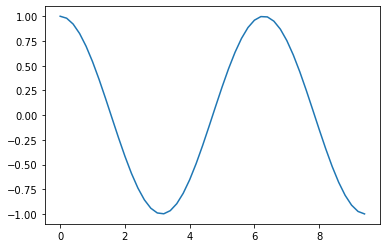

In [46]:
# Compute the x and y coordinates for points on a cosine curve
x = np.arange(0, 3 * np.pi, 0.2)
y = np.cos(x)
print("Plot the points using matplotlib:")
plt.plot(x, y)
plt.show()

1.6. Create a 4x4 matrix with values ranging from 1 to 16

In [47]:
np.arange(1,17).reshape(4,4)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])